In [ ]:
import os
import pandas as pd


In [ ]:
data_path = "/content/drive/MyDrive/Training AI/data.csv"
data_path

'/content/drive/MyDrive/Training AI/data.csv'

In [ ]:
data = pd.read_csv(data_path)
text = data['text']

In [ ]:
data

,text,label,number_of_words,cleaned_text,number_of_cleaned_words,tokens,stopwords_remove_tokens,lemmatized_text,final_text,final_number_of_words
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208,newsgroups talk politics mideast path cantalou...,222,"['newsgroups', 'talk', 'politics', 'mideast', ...","['newsgroups', 'talk', 'politics', 'mideast', ...","['newsgroups', 'talk', 'politics', 'mideast', ...",newsgroups talk politics mideast path cantalou...,152
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205,xref cantaloupe srv cs cmu edu talk politics m...,211,"['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",xref cantaloupe srv cs cmu edu talk politics m...,129
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157,xref cantaloupe srv cs cmu edu talk politics m...,223,"['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",xref cantaloupe srv cs cmu edu talk politics m...,187
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313,path cantaloupe srv cs cmu edu crabapple srv c...,292,"['path', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['path', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['path', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",path cantaloupe srv cs cmu edu crabapple srv c...,197
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291,xref cantaloupe srv cs cmu edu soc culture ara...,345,"['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",xref cantaloupe srv cs cmu edu soc culture ara...,205
...,...,...,...,...,...,...,...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,188,xref cantaloupe srv cs cmu edu talk religion m...,216,"['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",xref cantaloupe srv cs cmu edu talk religion m...,146
19993,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,158,xref cantaloupe srv cs cmu edu talk religion m...,171,"['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",xref cantaloupe srv cs cmu edu talk religion m...,136
19994,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc,177,xref cantaloupe srv cs cmu edu sci skeptic tal...,195,"['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",xref cantaloupe srv cs cmu edu sci skeptic tal...,134
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,466,xref cantaloupe srv cs cmu edu talk abortion t...,468,"['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...","['xref', 'cantaloupe', 'srv', 'cs', 'cmu', 'ed...",xref cantaloupe srv cs cmu edu talk abortion t...,264


In [ ]:
label = data['label']
label

0        talk.politics.mideast
1        talk.politics.mideast
2        talk.politics.mideast
3        talk.politics.mideast
4        talk.politics.mideast
                 ...          
19992       talk.religion.misc
19993       talk.religion.misc
19994       talk.religion.misc
19995       talk.religion.misc
19996       talk.religion.misc
Name: label, Length: 19997, dtype: object

In [ ]:
text

0        Newsgroups: talk.politics.mideast\nPath: canta...
1        Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
2        Xref: cantaloupe.srv.cs.cmu.edu talk.politics....
3        Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
4        Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...
                               ...                        
19992    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19993    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19994    Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...
19995    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
19996    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
Name: text, Length: 19997, dtype: object

In [ ]:
df = pd.DataFrame()
df['text'] = text
df['label'] = label
df.head()

,text,label
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast


In [ ]:
df['label'].value_counts()

comp.os.ms-windows.misc     1000
comp.windows.x              1000
rec.autos                   1000
talk.politics.misc          1000
rec.motorcycles             1000
sci.med                     1000
comp.sys.ibm.pc.hardware    1000
misc.forsale                1000
sci.crypt                   1000
rec.sport.baseball          1000
comp.sys.mac.hardware       1000
talk.religion.misc          1000
rec.sport.hockey            1000
talk.politics.mideast       1000
alt.atheism                 1000
sci.electronics             1000
talk.politics.guns          1000
sci.space                   1000
comp.graphics               1000
soc.religion.christian       997
Name: label, dtype: int64

In [ ]:
df['num_of_text'] = df['text'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

,text,label,num_of_text
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291


In [ ]:
import re
import string
def clean_header(text):
    text = re.sub(r'(From:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(Subject:[^\n]+\n)', '', text)
    text = re.sub(r'(([\sA-Za-z0-9\-]+)?[A|a]rchive-name:[^\n]+\n)', '', text)
    text = re.sub(r'(Last-modified:[^\n]+\n)', '', text)
    text = re.sub(r'(Version:[^\n]+\n)', '', text)
    return text

def clean_text(text):
    # remove header
    text = clean_header(text)
    # lower text
    text = text.lower()
    # remove text in square brackets
    text = re.sub('\[.*?\]', ' ', text)
    # remove link
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    # remove email
    text = re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',' ', text)
    # remove HTML tag
    text = re.sub('<.*?>+', ' ', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove special characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # remove empty line
    text = re.sub('\n', ' ', text)
    # # remove words containing numbers.
    text = re.sub('\w*\d\w*', ' ', text)
    # remove extra whitespaces
    text = re.sub(' +', ' ', text)
    # # remove single character
    text = ' '.join([word for word in text.split() if len(word) > 1])
    return text.strip()

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df.head()

,text,label,num_of_text,clean_text
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208,newsgroups talk politics mideast path cantalou...
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205,xref cantaloupe srv cs cmu edu talk politics m...
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157,xref cantaloupe srv cs cmu edu talk politics m...
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313,path cantaloupe srv cs cmu edu crabapple srv c...
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291,xref cantaloupe srv cs cmu edu soc culture ara...


In [ ]:
df['num_of_clean_text'] = df['clean_text'].apply(lambda x: len(str(x).split()))
df.head()

,text,label,num_of_text,clean_text,num_of_clean_text
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208,newsgroups talk politics mideast path cantalou...,222
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205,xref cantaloupe srv cs cmu edu talk politics m...,211
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157,xref cantaloupe srv cs cmu edu talk politics m...,223
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313,path cantaloupe srv cs cmu edu crabapple srv c...,292
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291,xref cantaloupe srv cs cmu edu soc culture ara...,345


In [ ]:
df['tokens'] = df['clean_text'].apply(lambda row: row.split())
df.head()

,text,label,num_of_text,clean_text,num_of_clean_text,tokens
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208,newsgroups talk politics mideast path cantalou...,222,"[newsgroups, talk, politics, mideast, path, ca..."
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205,xref cantaloupe srv cs cmu edu talk politics m...,211,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157,xref cantaloupe srv cs cmu edu talk politics m...,223,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313,path cantaloupe srv cs cmu edu crabapple srv c...,292,"[path, cantaloupe, srv, cs, cmu, edu, crabappl..."
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291,xref cantaloupe srv cs cmu edu soc culture ara...,345,"[xref, cantaloupe, srv, cs, cmu, edu, soc, cul..."


In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)


frozenset({'of', 'no', 'should', 'have', 'two', 'sixty', 'has', 'towards', 'if', 'few', 'eg', 'therefore', 'once', 'almost', 'co', 'our', 'thru', 'and', 'show', 'thin', 'becomes', 'so', 'her', 'itself', 'being', 'thereafter', 'those', 'beyond', 'hereupon', 'least', 'thence', 'this', 'not', 'would', 'in', 'whenever', 'around', 'between', 'although', 'keep', 'onto', 'only', 'yet', 'beside', 'ie', 'everything', 'because', 'when', 'afterwards', 'under', 'themselves', 'from', 'every', 'front', 'describe', 'take', 'well', 'whether', 'as', 'give', 'were', 'anyone', 'hereafter', 'indeed', 'moreover', 'your', 'such', 'whole', 'these', 'de', 'sincere', 'mostly', 'hereby', 'it', 'less', 'fill', 'besides', 'hasnt', 'couldnt', 'or', 'had', 'together', 'whereafter', 'bill', 'con', 'eleven', 'then', 'we', 'nine', 'the', 'seems', 'nobody', 'un', 'wherever', 'anywhere', 'next', 'whereby', 'name', 'now', 'could', 'first', 'further', 'still', 'all', 'whereupon', 'also', 'find', 'found', 'anything', 'fift

In [ ]:
def remove_sw(text):
    filtered_words = [word for word in text if word not in ENGLISH_STOP_WORDS]
    return filtered_words

df['text_remove_stopwords'] = df['tokens'].apply(lambda row: remove_sw(row))

In [ ]:
df.head()

,text,label,num_of_text,clean_text,num_of_clean_text,tokens,text_remove_stopwords
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208,newsgroups talk politics mideast path cantalou...,222,"[newsgroups, talk, politics, mideast, path, ca...","[newsgroups, talk, politics, mideast, path, ca..."
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205,xref cantaloupe srv cs cmu edu talk politics m...,211,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157,xref cantaloupe srv cs cmu edu talk politics m...,223,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, cs, cmu, edu, talk, po..."
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313,path cantaloupe srv cs cmu edu crabapple srv c...,292,"[path, cantaloupe, srv, cs, cmu, edu, crabappl...","[path, cantaloupe, srv, cs, cmu, edu, crabappl..."
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291,xref cantaloupe srv cs cmu edu soc culture ara...,345,"[xref, cantaloupe, srv, cs, cmu, edu, soc, cul...","[xref, cantaloupe, srv, cs, cmu, edu, soc, cul..."


In [ ]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lem = WordNetLemmatizer()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(lem.lemmatize("politics",'n'))

politics


In [ ]:
def lem_word(text):
    return [lem.lemmatize(word, pos = 'n') for word in text]

df['lemmatize_text'] = df['text_remove_stopwords'].apply(lem_word)


In [ ]:
def combine_tokens(tokens):
    text = ' '.join(tokens)
    return text

df['final'] = df['lemmatize_text'].apply(combine_tokens)


In [ ]:
df['count_of_final'] = df['final'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

,text,label,num_of_text,clean_text,num_of_clean_text,tokens,text_remove_stopwords,lemmatize_text,final,count_of_final
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208,newsgroups talk politics mideast path cantalou...,222,"[newsgroups, talk, politics, mideast, path, ca...","[newsgroups, talk, politics, mideast, path, ca...","[newsgroups, talk, politics, mideast, path, ca...",newsgroups talk politics mideast path cantalou...,152
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205,xref cantaloupe srv cs cmu edu talk politics m...,211,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, c, cmu, edu, talk, pol...",xref cantaloupe srv c cmu edu talk politics mi...,129
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157,xref cantaloupe srv cs cmu edu talk politics m...,223,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, c, cmu, edu, talk, pol...",xref cantaloupe srv c cmu edu talk politics mi...,187
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313,path cantaloupe srv cs cmu edu crabapple srv c...,292,"[path, cantaloupe, srv, cs, cmu, edu, crabappl...","[path, cantaloupe, srv, cs, cmu, edu, crabappl...","[path, cantaloupe, srv, c, cmu, edu, crabapple...",path cantaloupe srv c cmu edu crabapple srv c ...,197
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291,xref cantaloupe srv cs cmu edu soc culture ara...,345,"[xref, cantaloupe, srv, cs, cmu, edu, soc, cul...","[xref, cantaloupe, srv, cs, cmu, edu, soc, cul...","[xref, cantaloupe, srv, c, cmu, edu, soc, cult...",xref cantaloupe srv c cmu edu soc culture arab...,205


In [ ]:
data_text = df['final']
labels = df['label']
data_text,labels

(0        newsgroups talk politics mideast path cantalou...
 1        xref cantaloupe srv c cmu edu talk politics mi...
 2        xref cantaloupe srv c cmu edu talk politics mi...
 3        path cantaloupe srv c cmu edu crabapple srv c ...
 4        xref cantaloupe srv c cmu edu soc culture arab...
                                ...                        
 19992    xref cantaloupe srv c cmu edu talk religion mi...
 19993    xref cantaloupe srv c cmu edu talk religion mi...
 19994    xref cantaloupe srv c cmu edu sci skeptic talk...
 19995    xref cantaloupe srv c cmu edu talk abortion ta...
 19996    xref cantaloupe srv c cmu edu talk abortion al...
 Name: final, Length: 19997, dtype: object, 0        talk.politics.mideast
 1        talk.politics.mideast
 2        talk.politics.mideast
 3        talk.politics.mideast
 4        talk.politics.mideast
                  ...          
 19992       talk.religion.misc
 19993       talk.religion.misc
 19994       talk.religion.misc
 19995   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

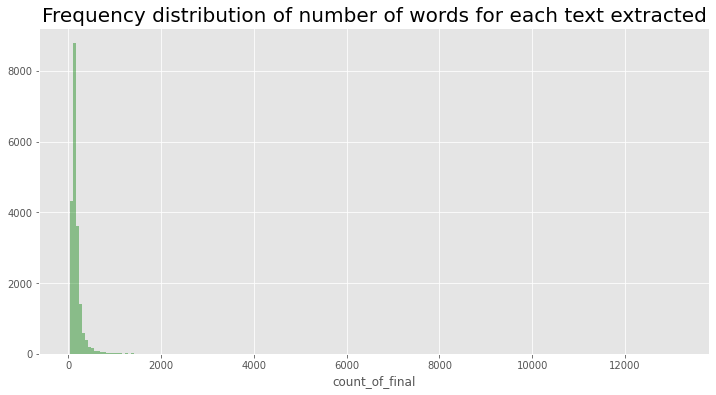

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df['count_of_final'], kde = False,color="green", bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['label'])
df['target'].unique()

array([17,  7,  4,  0,  9,  2, 10, 11, 13, 18,  8,  5,  1,  3, 12, 16, 14,
       15,  6, 19])

In [ ]:
df

,text,label,num_of_text,clean_text,num_of_clean_text,tokens,text_remove_stopwords,lemmatize_text,final,count_of_final,target
0,Newsgroups: talk.politics.mideast\nPath: canta...,talk.politics.mideast,208,newsgroups talk politics mideast path cantalou...,222,"[newsgroups, talk, politics, mideast, path, ca...","[newsgroups, talk, politics, mideast, path, ca...","[newsgroups, talk, politics, mideast, path, ca...",newsgroups talk politics mideast path cantalou...,152,17
1,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,205,xref cantaloupe srv cs cmu edu talk politics m...,211,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, c, cmu, edu, talk, pol...",xref cantaloupe srv c cmu edu talk politics mi...,129,17
2,Xref: cantaloupe.srv.cs.cmu.edu talk.politics....,talk.politics.mideast,157,xref cantaloupe srv cs cmu edu talk politics m...,223,"[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, cs, cmu, edu, talk, po...","[xref, cantaloupe, srv, c, cmu, edu, talk, pol...",xref cantaloupe srv c cmu edu talk politics mi...,187,17
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.politics.mideast,313,path cantaloupe srv cs cmu edu crabapple srv c...,292,"[path, cantaloupe, srv, cs, cmu, edu, crabappl...","[path, cantaloupe, srv, cs, cmu, edu, crabappl...","[path, cantaloupe, srv, c, cmu, edu, crabapple...",path cantaloupe srv c cmu edu crabapple srv c ...,197,17
4,Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...,talk.politics.mideast,291,xref cantaloupe srv cs cmu edu soc culture ara...,345,"[xref, cantaloupe, srv, cs, cmu, edu, soc, cul...","[xref, cantaloupe, srv, cs, cmu, edu, soc, cul...","[xref, cantaloupe, srv, c, cmu, edu, soc, cult...",xref cantaloupe srv c cmu edu soc culture arab...,205,17
...,...,...,...,...,...,...,...,...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,188,xref cantaloupe srv cs cmu edu talk religion m...,216,"[xref, cantaloupe, srv, cs, cmu, edu, talk, re...","[xref, cantaloupe, srv, cs, cmu, edu, talk, re...","[xref, cantaloupe, srv, c, cmu, edu, talk, rel...",xref cantaloupe srv c cmu edu talk religion mi...,146,19
19993,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,158,xref cantaloupe srv cs cmu edu talk religion m...,171,"[xref, cantaloupe, srv, cs, cmu, edu, talk, re...","[xref, cantaloupe, srv, cs, cmu, edu, talk, re...","[xref, cantaloupe, srv, c, cmu, edu, talk, rel...",xref cantaloupe srv c cmu edu talk religion mi...,136,19
19994,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc,177,xref cantaloupe srv cs cmu edu sci skeptic tal...,195,"[xref, cantaloupe, srv, cs, cmu, edu, sci, ske...","[xref, cantaloupe, srv, cs, cmu, edu, sci, ske...","[xref, cantaloupe, srv, c, cmu, edu, sci, skep...",xref cantaloupe srv c cmu edu sci skeptic talk...,134,19
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,466,xref cantaloupe srv cs cmu edu talk abortion t...,468,"[xref, cantaloupe, srv, cs, cmu, edu, talk, ab...","[xref, cantaloupe, srv, cs, cmu, edu, talk, ab...","[xref, cantaloupe, srv, c, cmu, edu, talk, abo...",xref cantaloupe srv c cmu edu talk abortion ta...,264,19


In [ ]:
X = df['final']
y = df['target']

In [ ]:
X.shape,y.shape

((19997,), (19997,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14997,), (14997,), (5000,), (5000,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(X_train)
vectorizer.fit(X_test)
X_train_vector = vectorizer.transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [ ]:
X_train_vector.shape,X_test_vector.shape

((14997, 48827), (5000, 48827))

In [ ]:
X_test_vector

<5000x48827 sparse matrix of type '<class 'numpy.float64'>'
	with 607188 stored elements in Compressed Sparse Row format>

In [ ]:
len(vectorizer.vocabulary_)

48827

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=300)

In [ ]:
svd.fit(X_train_vector)
svd.fit(X_test_vector)
X_train_svd = svd.transform(X_train_vector)
X_test_svd = svd.transform(X_test_vector)

In [ ]:
X_train_svd.shape

(14997, 300)

In [ ]:
training_time_container = {'logistic_clf': 0, 'knn': 0, 'nb':0, 'svm':0, 'ann': 0}
predicting_time_container = {'logistic_clf': 0, 'knn': 0,'nb':0, 'svm':0, 'ann': 0}
accuracy_container = {'logistic_clf': {'train': 0, 'val': 0, 'test': 0},
                               'knn': {'train': 0, 'val': 0, 'test': 0},
                                'nb': {'train': 0, 'val': 0, 'test': 0},
                               'svm': {'train': 0, 'val': 0, 'test': 0}, 
                               'ann': {'train': 0, 'val': 0, 'test': 0}
                     }

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time

def train_model(model, X_data, y_data, X_test, y_test, model_name):
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,test_size=0.2, random_state=42)
    
    start_train_time = time()
    model.fit(X_train, y_train)
    training_time = round(time() - start_train_time,4)
    training_time_container[model_name] = training_time

    start_predict_time = time()
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    predict_time = round(time() - start_predict_time,4)
    predicting_time_container[model_name] = predict_time

    train_acc = accuracy_score(y_train,y_pred_train)
    accuracy_container[model_name]['train'] = round(train_acc,4)
    val_acc = accuracy_score(y_val,y_pred_val)
    accuracy_container[model_name]['val'] = round(val_acc,4)
    test_acc = accuracy_score(y_test, y_pred_test)
    accuracy_container[model_name]['test']  = round(test_acc,4)

    print("Training score = " + str(accuracy_score(y_train,y_pred_train) * 100) + "%")
    print("Validation score = " + str(accuracy_score(y_val,y_pred_val) * 100) + "%")
    print("Testing score = " + str(accuracy_score(y_test, y_pred_test) * 100) + "%")
    print("Training time = " + str(training_time) + "s")
    print("Predicting time = " + str(predict_time) + "s")
    df_report = pd.DataFrame(classification_report(y_test,y_pred_test,output_dict=True)).transpose()
    
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=label_encoder.classes_)
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

    plt.show()
    return df_report

Training score = 94.29023922647329%
Validation score = 93.86666666666666%
Testing score = 93.34%
Training time = 3.6467s
Predicting time = 0.0215s


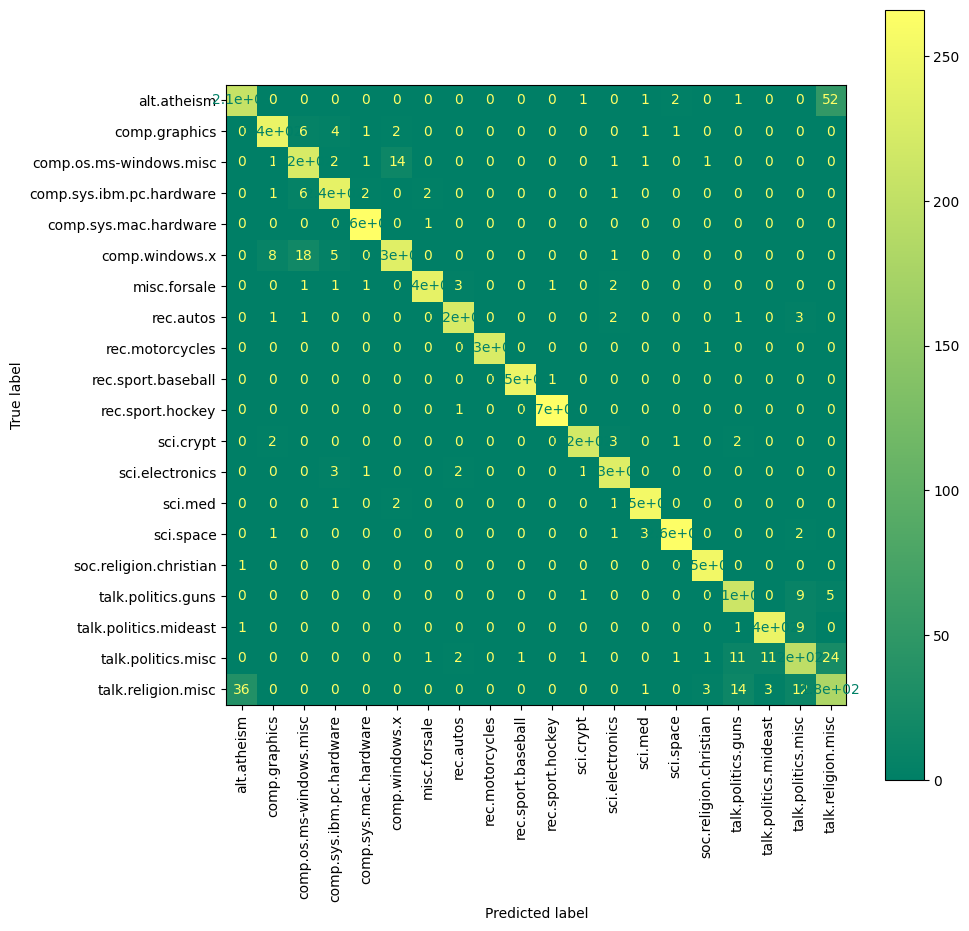

,precision,recall,f1-score,support
0,0.844262,0.783270,0.812623,263.0000
1,0.945736,0.942085,0.943907,259.0000
2,0.875000,0.914286,0.894212,245.0000
3,0.937255,0.952191,0.944664,251.0000
4,0.977860,0.996241,0.986965,266.0000
5,0.928287,0.879245,0.903101,265.0000
6,0.983539,0.963710,0.973523,248.0000
7,0.965517,0.965517,0.965517,232.0000
8,1.000000,0.995595,0.997792,227.0000
9,0.995951,0.995951,0.995951,247.0000


In [ ]:
from sklearn.linear_model import LogisticRegression

train_model(LogisticRegression(max_iter=100),X_train_svd,y_train,X_test_svd,y_test,'logistic_clf')

In [ ]:
from sklearn.model_selection import GridSearchCV

C_options = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=C_options)
logistic_reg = LogisticRegression(max_iter=1000 ,penalty='l2', multi_class='ovr')

grid = GridSearchCV(logistic_reg, param_grid, scoring = 'f1_macro', return_train_score=True)
grid.fit(X_train_svd, y_train)

# results = pd.DataFrame(grid.cv_results_)
# print(results)
# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbose=0)

In [ ]:
results = pd.DataFrame(grid.cv_results_)
print(results)

   mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       1.140150      0.024976  ...          0.068193         0.013720
1       1.008219      0.010955  ...          0.251679         0.004317
2       1.389577      0.011593  ...          0.867632         0.001591
3       1.844802      0.024886  ...          0.918905         0.000811
4       3.839887      0.161602  ...          0.938890         0.000909
5       6.855948      0.175370  ...          0.953055         0.000876
6      13.408254      0.383533  ...          0.965052         0.000765

[7 rows x 21 columns]


In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9412814905942973
{'C': 10}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Training score = 95.22380595148788%
Validation score = 94.46666666666667%
Testing score = 93.84%
Training time = 7.2986s
Predicting time = 0.0221s


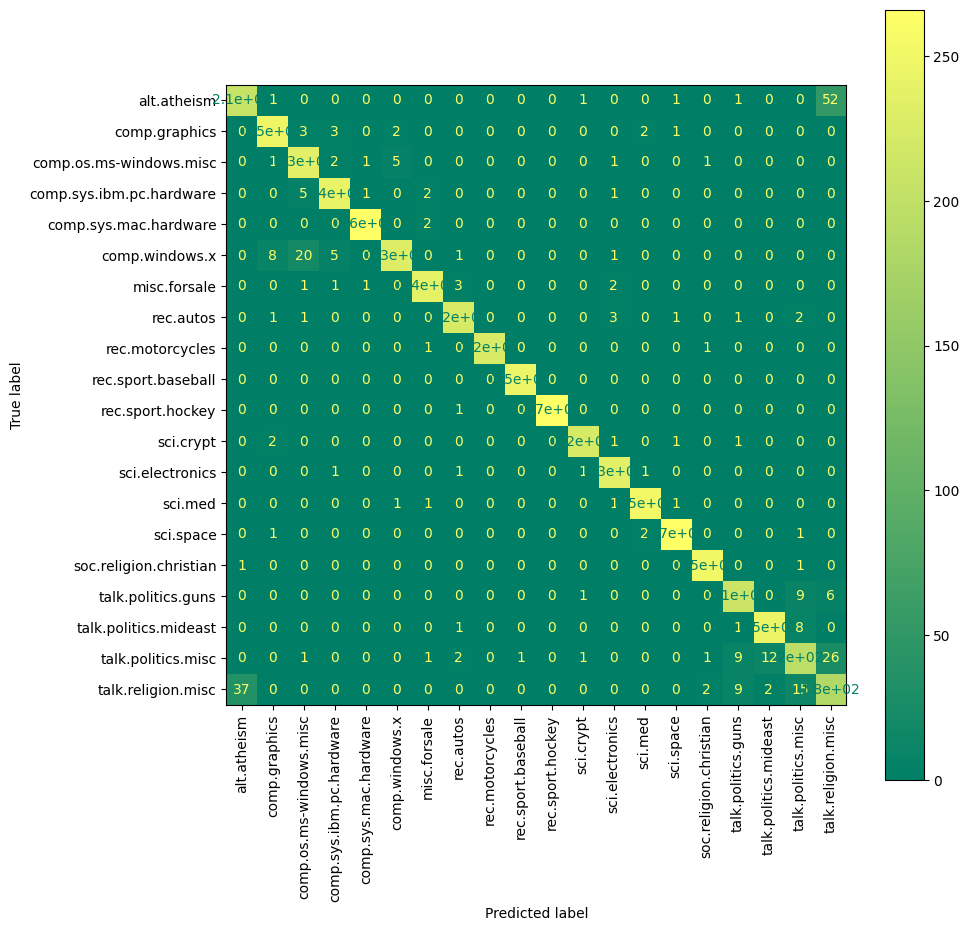

,precision,recall,f1-score,support
0,0.844898,0.787072,0.814961,263.0000
1,0.946565,0.957529,0.952015,259.0000
2,0.883019,0.955102,0.917647,245.0000
3,0.952756,0.964143,0.958416,251.0000
4,0.988764,0.992481,0.990619,266.0000
5,0.966387,0.867925,0.914513,265.0000
6,0.971660,0.967742,0.969697,248.0000
7,0.961207,0.961207,0.961207,232.0000
8,1.000000,0.991189,0.995575,227.0000
9,0.995968,1.000000,0.997980,247.0000


In [ ]:
train_model(grid.best_estimator_, X_train_svd, y_train, X_test_svd, y_test, model_name='logistic_clf')

Training score = 87.99699924981246%
Validation score = 80.36666666666666%
Testing score = 79.67999999999999%
Training time = 0.369s
Predicting time = 139.2936s


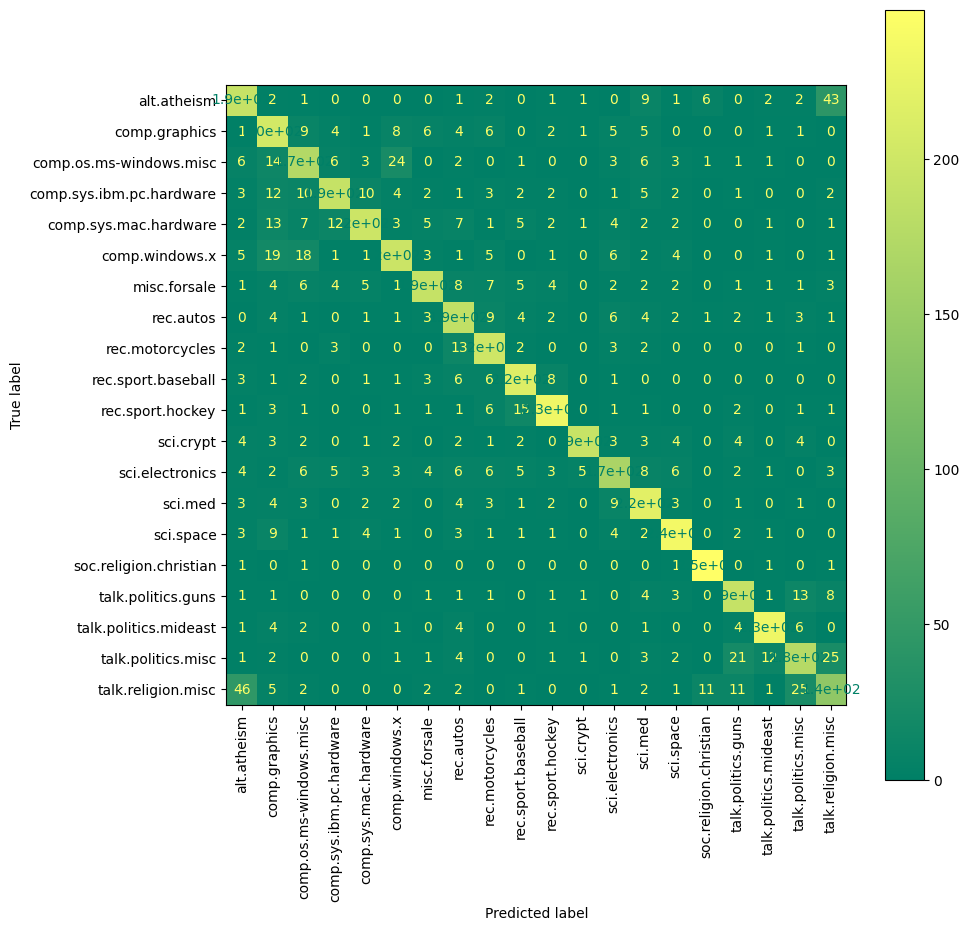

,precision,recall,f1-score,support
0,0.685714,0.730038,0.707182,263.0000
1,0.665584,0.791506,0.723104,259.0000
2,0.707317,0.710204,0.708758,245.0000
3,0.841410,0.760956,0.799163,251.0000
4,0.860870,0.744361,0.798387,266.0000
5,0.788000,0.743396,0.765049,265.0000
6,0.860360,0.770161,0.812766,248.0000
7,0.727626,0.806034,0.764826,232.0000
8,0.778210,0.881057,0.826446,227.0000
9,0.830116,0.870445,0.849802,247.0000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train_model(KNeighborsClassifier(),X_train_svd,y_train,X_test_svd,y_test,'knn')

Training score = 94.76535800616821%
Validation score = 90.03333333333333%
Testing score = 89.36%
Training time = 0.0665s
Predicting time = 0.0569s


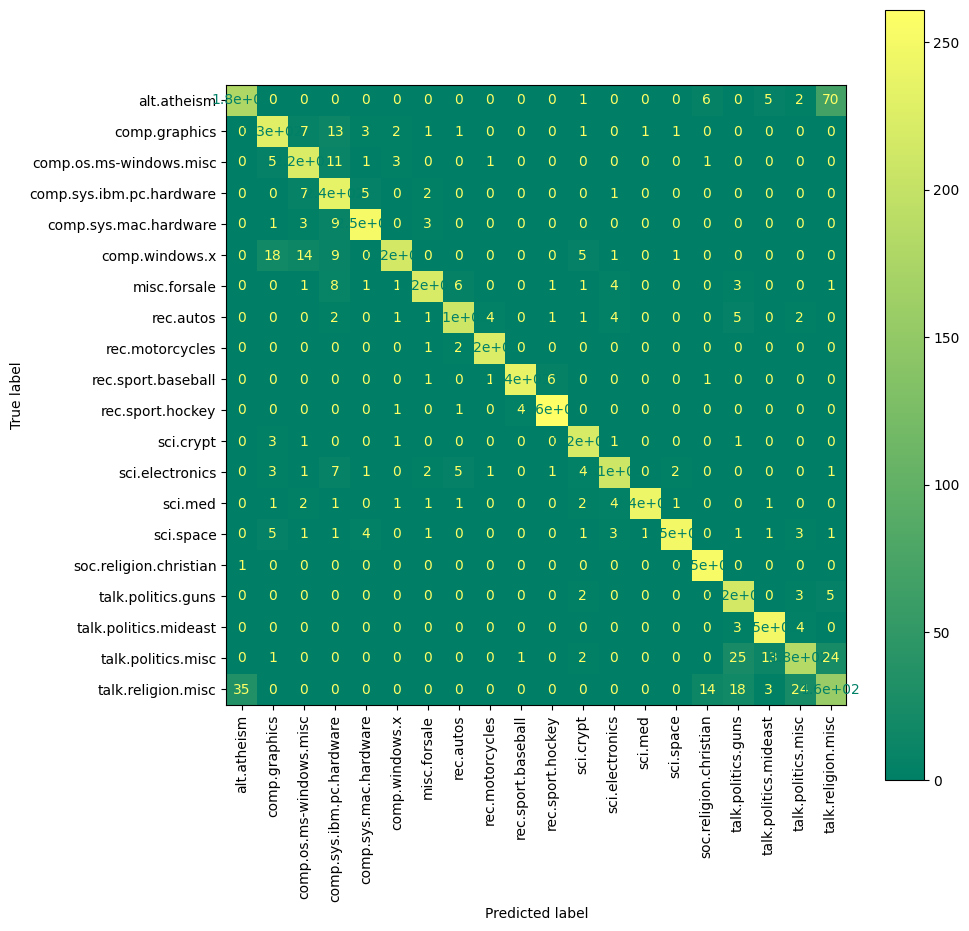

,precision,recall,f1-score,support
0,0.832558,0.680608,0.748954,263.0000
1,0.860902,0.884170,0.872381,259.0000
2,0.857692,0.910204,0.883168,245.0000
3,0.794613,0.940239,0.861314,251.0000
4,0.943396,0.939850,0.941620,266.0000
5,0.955947,0.818868,0.882114,265.0000
6,0.944444,0.891129,0.917012,248.0000
7,0.929515,0.909483,0.919390,232.0000
8,0.969697,0.986784,0.978166,227.0000
9,0.979424,0.963563,0.971429,247.0000


In [ ]:
from sklearn.naive_bayes import MultinomialNB
train_model(MultinomialNB(), X_train_vector,y_train,X_test_vector,y_test,'nb')


In [ ]:
params = {'alpha': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4,1.5]}
clf = MultinomialNB()
clf = GridSearchCV(clf, params, cv=5)
clf.fit(X_train_vector, y_train)

print (clf.best_score_)
print (clf.best_params_)
print (clf.best_estimator_)

0.8998466155385128
{'alpha': 1.4}
MultinomialNB(alpha=1.4, class_prior=None, fit_prior=True)


In [ ]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069244,0.006378,0.009524,0.000441,0.5,{'alpha': 0.5},0.902667,0.891333,0.902968,0.903301,0.893298,0.898713,0.005264,9
1,0.068447,0.003163,0.011809,0.001882,0.6,{'alpha': 0.6},0.902333,0.891667,0.902634,0.904635,0.892631,0.898780,0.005480,8
2,0.070146,0.003011,0.010302,0.000262,0.7,{'alpha': 0.7},0.902000,0.893000,0.903968,0.904968,0.891964,0.899180,0.005561,5
3,0.063751,0.002667,0.009477,0.000548,0.8,{'alpha': 0.8},0.900667,0.893667,0.901300,0.903635,0.890964,0.898046,0.004859,11
4,0.062344,0.000504,0.009853,0.001523,0.9,{'alpha': 0.9},0.901667,0.894667,0.901967,0.904635,0.889630,0.898513,0.005533,10
5,0.055173,0.001509,0.010243,0.001119,1,{'alpha': 1},0.901333,0.895000,0.901634,0.904635,0.891631,0.898847,0.004782,7
6,0.065509,0.003360,0.010303,0.001145,1.1,{'alpha': 1.1},0.901667,0.895333,0.901967,0.905635,0.890964,0.899113,0.005252,6
7,0.069017,0.001565,0.012027,0.002484,1.2,{'alpha': 1.2},0.902000,0.896000,0.901300,0.905302,0.891631,0.899247,0.004838,4
8,0.061551,0.001358,0.009393,0.000544,1.3,{'alpha': 1.3},0.901333,0.897333,0.900967,0.905302,0.891964,0.899380,0.004485,3
9,0.071640,0.002164,0.011518,0.001367,1.4,{'alpha': 1.4},0.901667,0.898333,0.901634,0.904968,0.892631,0.899847,0.004174,1


Training score = 94.47361840460114%
Validation score = 90.10000000000001%
Testing score = 89.5%
Training time = 0.0583s
Predicting time = 0.0514s


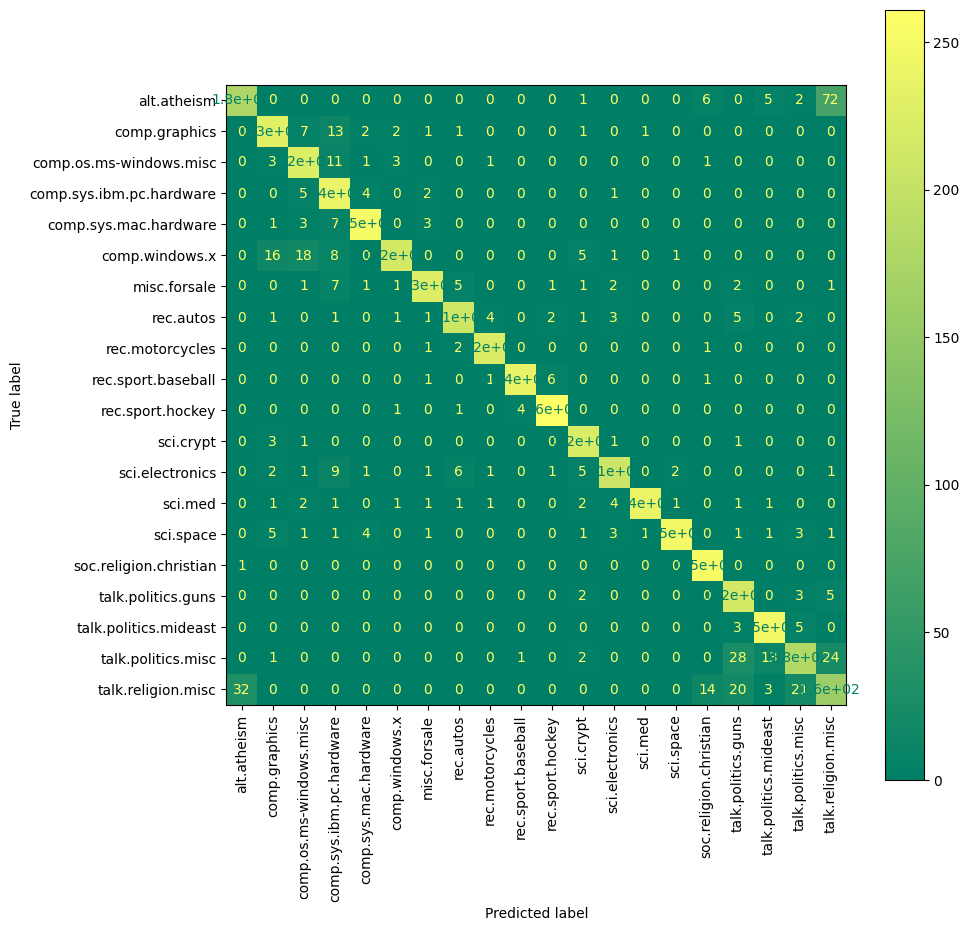

,precision,recall,f1-score,support
0,0.842857,0.673004,0.748414,263.000
1,0.875000,0.891892,0.883365,259.000
2,0.852273,0.918367,0.884086,245.000
3,0.804714,0.952191,0.872263,251.000
4,0.950943,0.947368,0.949153,266.000
5,0.960000,0.815094,0.881633,265.000
6,0.949580,0.911290,0.930041,248.000
7,0.929515,0.909483,0.919390,232.000
8,0.965368,0.982379,0.973799,227.000
9,0.979424,0.963563,0.971429,247.000


In [ ]:
train_model(clf.best_estimator_, X_train_vector, y_train, X_test_vector, y_test, model_name='nb')

Training score = 97.05759773276652%
Validation score = 94.03333333333333%
Testing score = 93.44%
Training time = 20.7449s
Predicting time = 43.5657s


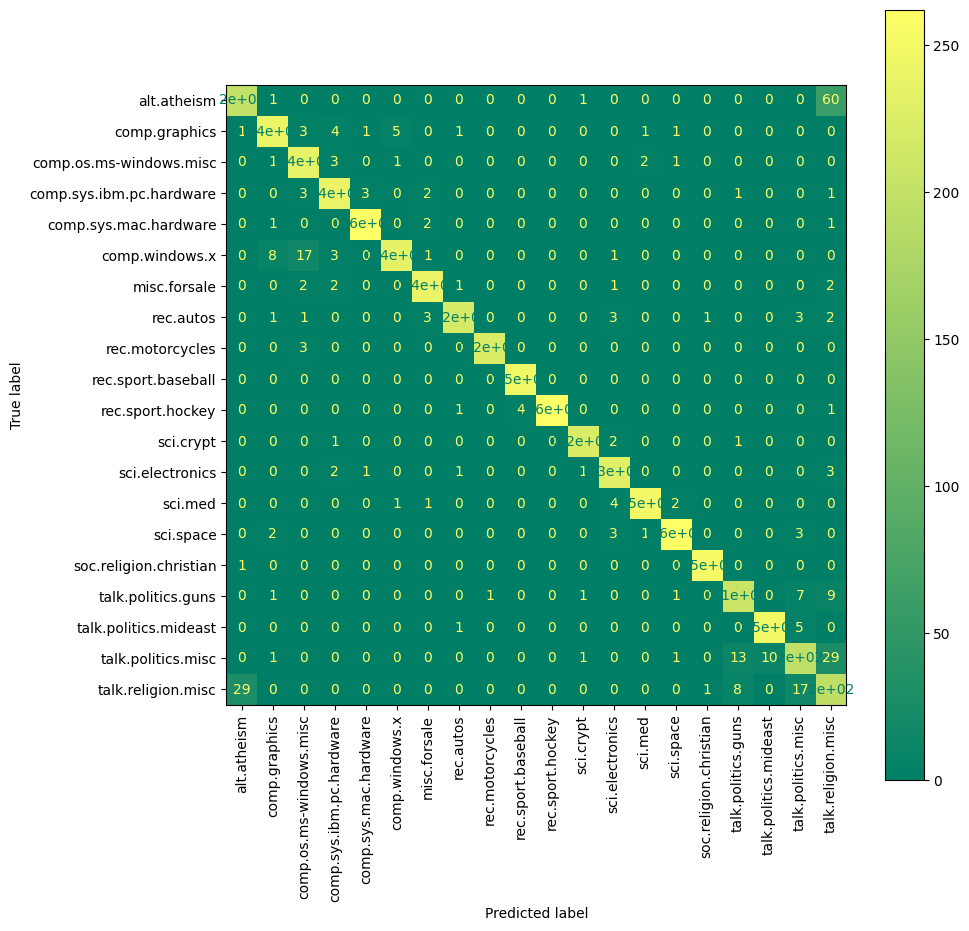

,precision,recall,f1-score,support
0,0.866379,0.764259,0.812121,263.0000
1,0.937984,0.934363,0.936170,259.0000
2,0.890977,0.967347,0.927593,245.0000
3,0.941406,0.960159,0.950690,251.0000
4,0.981273,0.984962,0.983114,266.0000
5,0.971074,0.886792,0.927022,265.0000
6,0.963855,0.967742,0.965795,248.0000
7,0.977578,0.939655,0.958242,232.0000
8,0.995556,0.986784,0.991150,227.0000
9,0.984064,1.000000,0.991968,247.0000


In [ ]:
from sklearn.svm import SVC
train_model(SVC(),X_train_svd,y_train,X_test_svd,y_test,'svm')

In [ ]:


# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               }  
  
# svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# # fitting the model for grid search 
# svc.fit(X_train_svd, y_train) 

# print (svc.best_score_)
# print (svc.best_params_)
# print (svc.best_estimator_)
# # C = 1000 gamma = 0.001

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tlayer
from tensorflow.keras import Input,Model
from tensorflow.keras import models, optimizers

def ann(input_layers):
    inputs = Input(shape=(input_layers,))
    layer = tlayer.Dense(512, activation=tf.nn.relu)(inputs)
    layer = tlayer.Dense(256, activation=tf.nn.relu)(layer)
    layer = tlayer.Dense(256, activation=tf.nn.relu)(layer)
    layer = tlayer.Dense(256, activation=tf.nn.relu)(layer)
    outputs = tlayer.Dense(20, activation=tf.nn.softmax)(layer)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
from tensorflow.keras import models, optimizers
from tensorflow.keras.callbacks import EarlyStopping 
def train_ann(model, X_data, y_data, X_test, y_test, model_name):
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,test_size=0.2, random_state=42)

    earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
    # Fitting the model 
    start_train_time = time()
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=3, batch_size=128,callbacks=[earlystop])
    training_time = round(time() - start_train_time,4)
    training_time_container[model_name] = training_time    
    # Predicting the Test and Val set results
    start_predict_time = time()
    # Predict probability
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    # Get predict
    

    y_pred_train = y_pred_train.argmax(axis=-1)
    y_pred_val = y_pred_val.argmax(axis=-1)
    y_pred_test = y_pred_test.argmax(axis=-1)
    predict_time = round(time() - start_predict_time,4)
    predicting_time_container[model_name] = predict_time

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

    train_acc = accuracy_score(y_train,y_pred_train)
    accuracy_container[model_name]['train'] = round(train_acc,4)
    val_acc = accuracy_score(y_val,y_pred_val)
    accuracy_container[model_name]['val'] = round(val_acc,4)
    test_acc = accuracy_score(y_test, y_pred_test)
    accuracy_container[model_name]['test']  = round(test_acc,4)

    print("Training score = " + str(accuracy_score(y_train,y_pred_train) * 100) + "%")
    print("Validation score = " + str(accuracy_score(y_val,y_pred_val) * 100) + "%")
    print("Testing score = " + str(accuracy_score(y_test, y_pred_test) * 100) + "%")
    print("Training time = " + str(training_time) + "s")
    print("Predicting time = " + str(predict_time) + "s")
    df_report = pd.DataFrame(classification_report(y_test,y_pred_test,output_dict=True)).transpose()
    
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=label_encoder.classes_)
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

    plt.show()

    return df_report

Epoch 1/3
94/94 [==============================] - 2s 11ms/step - loss: 1.2707 - accuracy: 0.6748 - val_loss: 0.3339 - val_accuracy: 0.8883
Epoch 2/3
94/94 [==============================] - 1s 10ms/step - loss: 0.2228 - accuracy: 0.9291 - val_loss: 0.1996 - val_accuracy: 0.9323
Epoch 3/3
94/94 [==============================] - 1s 10ms/step - loss: 0.1515 - accuracy: 0.9480 - val_loss: 0.1681 - val_accuracy: 0.9443


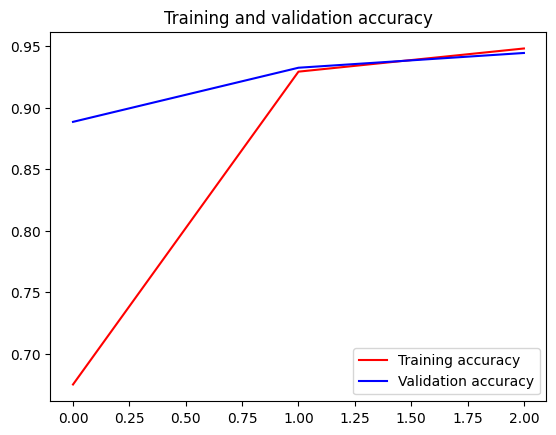

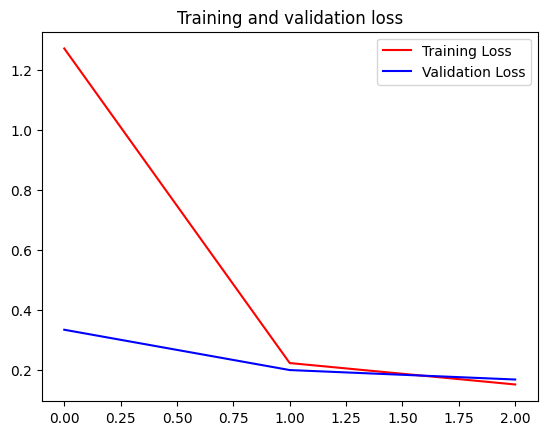

Training score = 95.72393098274569%
Validation score = 94.43333333333334%
Testing score = 93.32000000000001%
Training time = 3.7547s
Predicting time = 0.9021s


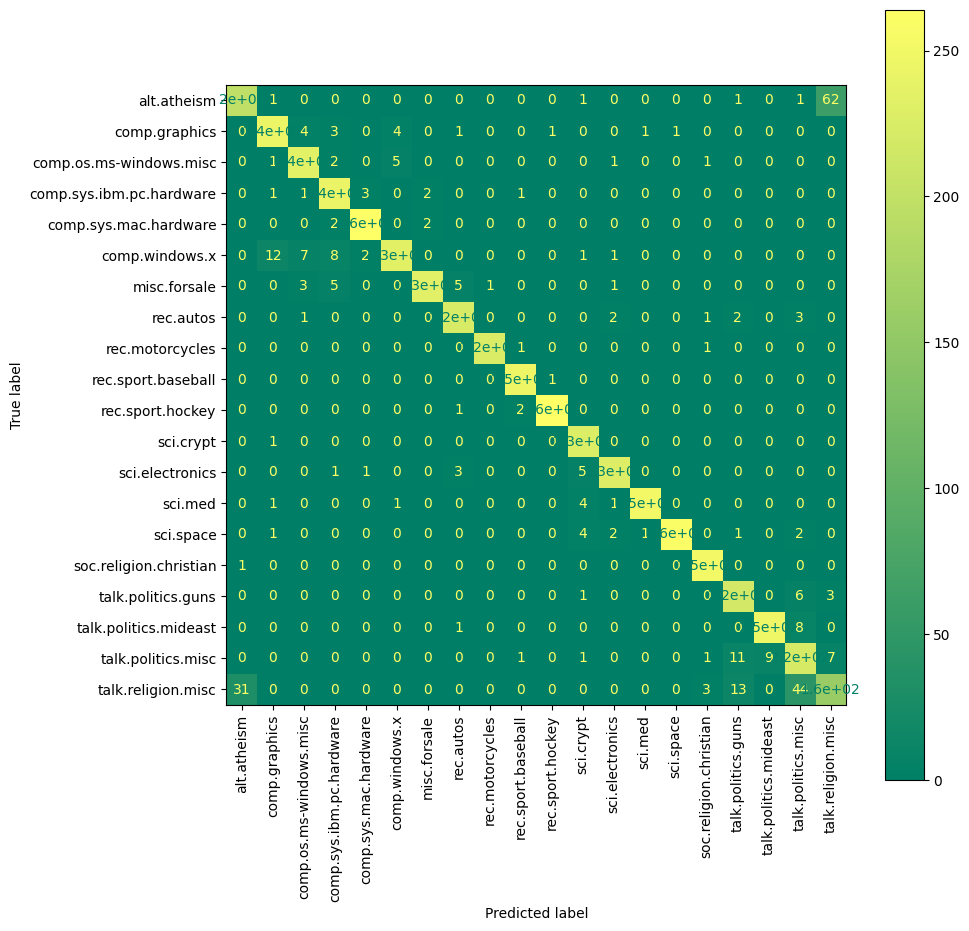

,precision,recall,f1-score,support
0,0.860262,0.749049,0.800813,263.0000
1,0.931298,0.942085,0.936660,259.0000
2,0.936255,0.959184,0.947581,245.0000
3,0.920455,0.968127,0.943689,251.0000
4,0.977612,0.984962,0.981273,266.0000
5,0.959016,0.883019,0.919450,265.0000
6,0.983122,0.939516,0.960825,248.0000
7,0.952991,0.961207,0.957082,232.0000
8,0.995575,0.991189,0.993377,227.0000
9,0.980080,0.995951,0.987952,247.0000


In [ ]:
train_ann(ann(X_train_svd.shape[1]),X_train_svd,y_train, X_test_svd,y_test,'ann')

In [ ]:
df_result = pd.DataFrame(columns=["Model name", "Train Score", "Validation Score", "Test Score", "Training Time", "Prediction Time"])
df_result

,Model name,Train Score,Validation Score,Test Score,Training Time,Prediction Time


In [ ]:
def show_result(training_time_container, predicting_time_container, accuracy_container):
    df_result = pd.DataFrame(columns=["Model name", "Train Score", "Validation Score", "Test Score", "Training Time", "Prediction Time"])
    for model in training_time_container:
        df_result = df_result.append({
            "Model name": model,
            "Train Score": accuracy_container[model]['train']*100,
            "Validation Score": accuracy_container[model]['val']*100,
            "Test Score": accuracy_container[model]['test']*100,
            "Training Time": training_time_container[model],
            "Prediction Time": predicting_time_container[model],
        },ignore_index = True)

    return df_result

In [ ]:
show_result(training_time_container, predicting_time_container, accuracy_container)

,Model name,Train Score,Validation Score,Test Score,Training Time,Prediction Time
0,logistic_clf,95.22,94.47,93.84,7.2986,0.0221
1,knn,88.00,80.37,79.68,0.3690,139.2936
2,nb,94.47,90.10,89.50,0.0583,0.0514
3,svm,97.06,94.03,93.44,20.7449,43.5657
4,ann,95.72,94.43,93.32,3.7547,0.9021


In [ ]:
import plotly.graph_objects as go

In [ ]:
data = list(accuracy_container.values())
fig=go.Figure(data=[go.Bar(name = 'train', 
                           x =list(accuracy_container.keys()),
                           y = [data[i]['train'] for i in range(len(data))], 
                           text =[data[i]['train'] for i in range(len(data))], 
                           textposition='auto' ),
                    go.Bar(name = 'val', 
                           x =list(accuracy_container.keys()), 
                           y = [data[i]['val'] for i in range(len(data))], 
                           text =[data[i]['val'] for i in range(len(data))], 
                           textposition='auto'),
                    go.Bar(name = 'test', 
                           x =list(accuracy_container.keys()), 
                           y = [data[i]['test'] for i in range(len(data))], 
                           text =[data[i]['test'] for i in range(len(data))], 
                           textposition='auto')])
fig.update_layout(title_text='Comparing of Accuracy Score of different classifier',
                  xaxis_title="Models",
                  yaxis_title="Accuracy Score",)

fig               

In [ ]:
data = list(training_time_container.values())
fig=go.Figure(data=[go.Bar(name = 'train', 
                           x =list(training_time_container.keys()),
                           y = [data[i] for i in range(len(data))], 
                           text =[data[i] for i in range(len(data))], 
                           textposition='auto' ),
                    ])
fig.update_layout(title_text='Comparing of Training Time of different classifier',
                  xaxis_title="Models",
                  yaxis_title="Training Time",)

fig  

In [ ]:
data = list(predicting_time_container.values())
fig=go.Figure(data=[go.Bar(name = 'train', 
                           x =list(predicting_time_container.keys()),
                           y = [data[i] for i in range(len(data))], 
                           text =[data[i] for i in range(len(data))], 
                           textposition='auto' ),
                    ])
fig.update_layout(title_text='Comparing of Predicting Time of different classifier',
                  xaxis_title="Models",
                  yaxis_title="Predicting Time",)

fig  